#Problem Definition:

Our objective is to analyze the dataset to uncover insights into the factors influencing clients' subscription to term deposit accounts. Besides that, we aim to optimize model performance through **hyperparameter tuning like Grid Search**, **data augmentation**, and **feature selection** methods. By understanding these patterns, the bank can refine its marketing strategies, effectively targeting the right audience segments to enhance campaign effectiveness.

1. Can model performance improved?
2. Which features are important for bank marketing strategies?
<hr/>

**Term** **deposit**
    is a fixed deposit or time deposit, is a type of investment offered by banks and financial institutions. In a term deposit, an individual deposits a certain amount of money with the bank for a fixed period of time, known as the term or maturity period. The money is held by the bank for the specified duration, during which it earns a fixed interest rate.



# Dataset Overview:


The dataset contains information collected during the bank's marketing campaigns. It includes various features related to bank clients, their interactions with the bank, and the outcomes of previous marketing efforts. The target variable indicates whether a client has subscribed to a term deposit account.


# Description of Columns:


1. **Age**: Numeric feature representing the age of the bank client.
2. **Job**: Categorical feature indicating the type of job the client has.
3. **Marital**: Categorical feature indicating the marital status of the client.
4. **Education**: Categorical feature representing the educational level of the client.
5. **Default**: Categorical feature indicating whether the client has credit in default.
6. **Housing**: Categorical feature indicating whether the client has a housing loan.
7. **Loan**: Categorical feature indicating whether the client has a personal loan.
8. **Balance**: Numeric feature representing the balance of the individual.
9. **Contact**: Categorical feature indicating the communication type used to contact the client.
10. **Month**: Categorical feature indicating the month of the last contact.
11. **Day**: Categorical feature indicating the day of the week of the last contact.
12. **Duration**: Numeric feature representing the duration of the last contact in seconds.
13. **Campaign**: Numeric feature representing the number of contacts performed during the current campaign for this client.
14. **Pdays**: Numeric feature representing the number of days since the client was last contacted from a previous campaign.
15. **Previous**: Numeric feature representing the number of contacts performed before the current campaign for this client.
16. **Poutcome**: Categorical feature representing the outcome of the previous marketing campaign.
17. **deposite (Target)**: Binary feature indicating whether the client has subscribed to a term deposit.

#Methodology:



We use model like:
- Random Forest.

Evaluated using metrics like
- accuracy
- precision
- recall
- ROC-AUC.


# Hyperparameters Meaning:


1. Model Complexity:

Parameters like **max_depth**, **min_samples_split**, **min_samples_leaf**, **max_leaf_nodes**,**min_weight_fraction_leaf**,**ccp_alpha** help control the complexity of each tree, preventing overfitting.

2. Randomness and Diversity:

Parameters like **n_estimators**, **criterion**, **max_features**, **class_weight** and **bootstrap** introduce randomness and diversity in the model, which improves generalization and robustness.

3. Efficiency:

Parameters like **n_jobs** control the computational efficiency and verbosity during training.

4. Reproducibility:

The **random_state** parameter ensures that results are reproducible.

# Import Libraries

In [9]:
import numpy as np                                              # Import numpy for numerical operations
import pandas as pd                                             # Import pandas for data manipulation
import seaborn as sns                                           # Import seaborn for statistical data visualization
import matplotlib.pyplot as plt                                 # Import matplotlib for plotting
from sklearn.metrics import ConfusionMatrixDisplay              # Import ConfusionMatrixDisplay for displaying confusion matrices
from sklearn.ensemble import RandomForestClassifier             # Import RandomForestClassifier from sklearn's ensemble module
from sklearn.model_selection import train_test_split            # Import train_test_split to split data into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Import LabelEncoder and StandardScaler for data preprocessing
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_curve, auc)    # Import various metrics for evaluating classifier performance
%matplotlib inline
import warnings                                                 # Import warnings module to handle warnings
warnings.filterwarnings("ignore")                               # Ignore any warnings

#### Data Loading and Exploration

In [10]:
df=pd.read_csv('/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [11]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [12]:
df.shape

(11162, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [15]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
10591,59,retired,divorced,unknown,no,-49,yes,no,unknown,13,may,248,2,-1,0,unknown,no
7879,35,management,single,secondary,yes,-202,yes,no,unknown,20,may,268,3,-1,0,unknown,no
4070,34,technician,single,secondary,no,1279,yes,no,cellular,21,oct,339,3,91,10,success,yes
6039,41,technician,married,secondary,no,201,no,yes,cellular,14,jul,53,8,-1,0,unknown,no
10435,25,technician,divorced,secondary,no,86,no,yes,cellular,8,jul,483,2,-1,0,unknown,no


#### Missing Values

In [16]:
null_counts = df.isnull().sum()
print(null_counts)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


we see the is no missing values

# Exploratory Data Analysis (EDA)

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


**Target class weight (To identify whether to use the parameter "class_weight"):**

Count off different class not the same apply class_weight else not


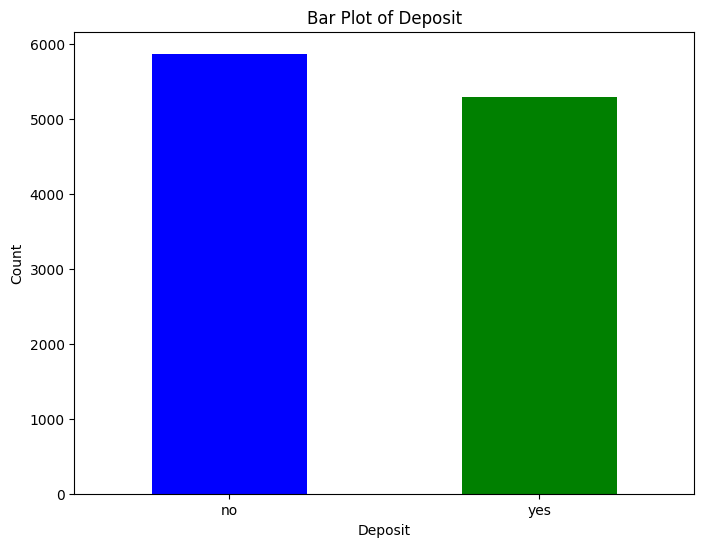

In [18]:
plt.figure(figsize=(8, 6))
df['deposit'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Deposit')
plt.ylabel('Count')
plt.title('Bar Plot of Deposit')
plt.xticks(rotation=0)
plt.show()

# prepare data for modeling

In [19]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes


## Separate categorical and numerical columns

In [20]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

In [21]:
df[numerical_columns].head(3)

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0


In [22]:
df[categorical_columns].head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes


## convert categorical columns to numerical

Apply label encoding to categorical columns

In [23]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

Apply scaling to numerical columns

In [24]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,0,1,1,0,0.252525,1,0,2,-1.265746,8,1.930226,-0.554168,-0.481184,-0.36326,3,1
1,1.239676,0,1,1,0,-0.459974,0,0,2,-1.265746,8,3.154612,-0.554168,-0.481184,-0.36326,3,1
2,-0.019470,9,1,1,0,-0.080160,1,0,2,-1.265746,8,2.929901,-0.554168,-0.481184,-0.36326,3,1


# Data spliting

Split features (data) and target variable

In [25]:
X = df.drop(columns=['deposit'])
y = df['deposit']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print('train features shape: ',X_train.shape)
print('train target   shape: ',y_train.shape)
print('__________\n')
print('test  features shape: ',X_test.shape)
print('test  target   shape: ',y_test.shape)

train features shape:  (8929, 16)
train target   shape:  (8929,)
__________

test  features shape:  (2233, 16)
test  target   shape:  (2233,)


# Modeling

## Random forest classifier

### model training

In [206]:
RF = RandomForestClassifier(
    n_estimators=10,  # Increased number of trees for better generalization
    criterion="entropy",  # Using entropy for information gain
    max_depth=10,  # Limiting the maximum depth to avoid overfitting
    max_features=17,
    min_samples_split=5,  # Increasing min_samples_split for higher node purity
    min_samples_leaf=2,  # Increasing min_samples_leaf for higher node purity
    min_weight_fraction_leaf=0.0,  # Minimum weighted fraction of the total sum of weights for a leaf node
    max_leaf_nodes=17,  # Unlimited maximum leaf nodes
    bootstrap=True,  # Using bootstrap samples
    # n_jobs=-1,                        # Utilizing all processors for parallel processing (CPU)
    random_state=42,  # Setting a random seed for reproducibility
    warm_start=False,  # Not reusing previous solution (Useful when to analysis the performance of different value of estimator with same other parameters value)
    class_weight=None,  # No specific class weights
)

RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=17,
                       min_samples_leaf=2, min_samples_split=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

### Evaluation

In [207]:
y_pred=RF.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [208]:
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.84      0.76      0.80      1166
     deposit       0.76      0.84      0.80      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



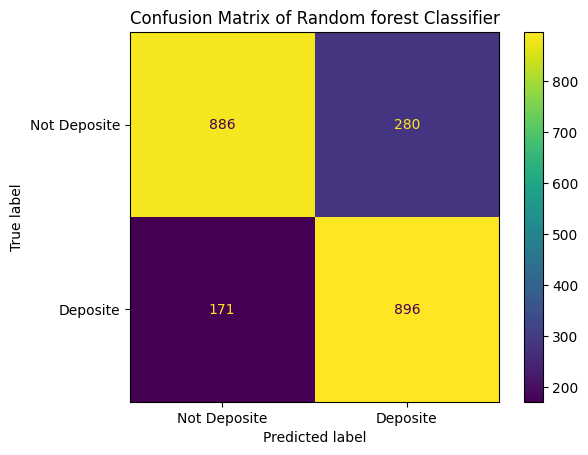

In [209]:

cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Random forest Classifier")
plt.show()

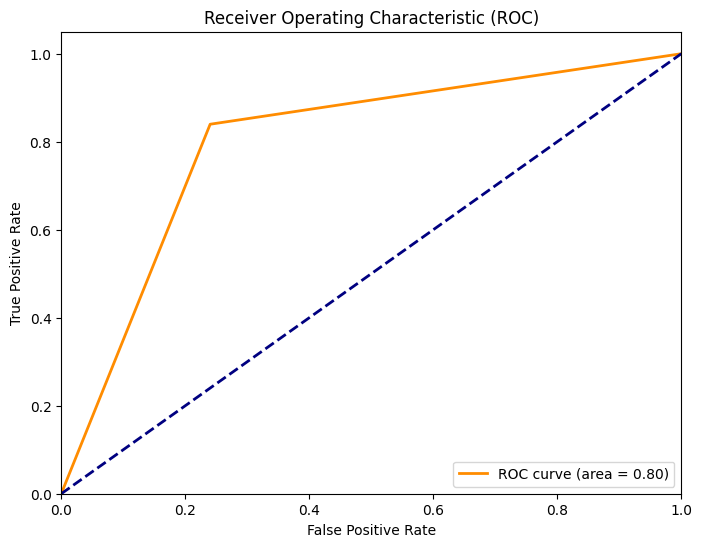

In [210]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### save reults

In [211]:
model_result = ['Random Forest',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.781460,0.795107,0.731022,0.761719,0.779319
1,CNN,0.950291,0.938532,0.958763,0.948540,0.950651
2,Random Forest,0.950291,0.938532,0.958763,0.948540,0.950651
3,Random Forest,0.821764,0.813496,0.813496,0.813496,0.821413
4,Random Forest,0.828482,0.803191,0.849110,0.825513,0.829358
5,Random Forest,0.832064,0.803509,0.858482,0.830086,0.833186
6,Random Forest,0.804747,0.787079,0.810684,0.798707,0.804999
7,Random Forest,0.827138,0.798946,0.852858,0.825023,0.828230
8,Random Forest,0.818182,0.786644,0.850047,0.817117,0.819535
9,Random Forest,0.798030,0.761905,0.839738,0.798930,0.799800
